In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

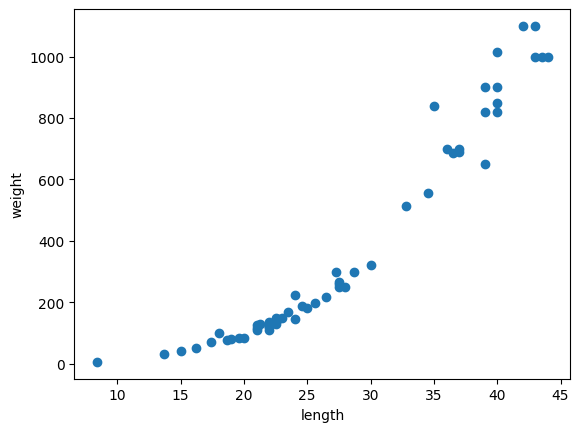

In [3]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [4]:
len(perch_length)

56

In [5]:
len(perch_weight)

56

In [7]:
# shape 샘플 수, 특성 수 출력
print(perch_length.shape)

(56,)


In [8]:
print(perch_weight.shape)

(56,)


In [36]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [37]:
print(train_target.shape, test_target.shape)

(42,) (14,)


In [38]:
study_arr = np.array([1,2,3,4])
print(study_arr.reshape(2,2))

[[1 2]
 [3 4]]


In [39]:
# reshape'-1'은 차원이 확실하지 않을 때 남은 배열길이와 차원을 추정하여 정렬
print(study_arr.reshape(-1,1))

[[1]
 [2]
 [3]
 [4]]


In [53]:
train_input = train_input.reshape(-1,1)  # Reshape to 2D
test_input = test_input.reshape(-1,1) 

In [89]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.n_neighbors = 7 # 하이퍼파라미터 튜닝 1,3,5,7

knr.fit(train_input, train_target)

# 모델의 평가
# 좋은 모델 = score  -> train -> test
# train < test -> 과소적합
print(knr.score(test_input, test_target))
print(knr.score(train_input, train_target))

0.9781383949643516
0.9761170732051527


In [76]:
t_input=test_input[2]
p = knr.predict(t_input.reshape(1,-1))

In [77]:
print(f"예측 사용 무게:{p}")
print(f"실 무게:{test_target[2]}")

예측 사용 무게:[235.]
실 무게:250.0


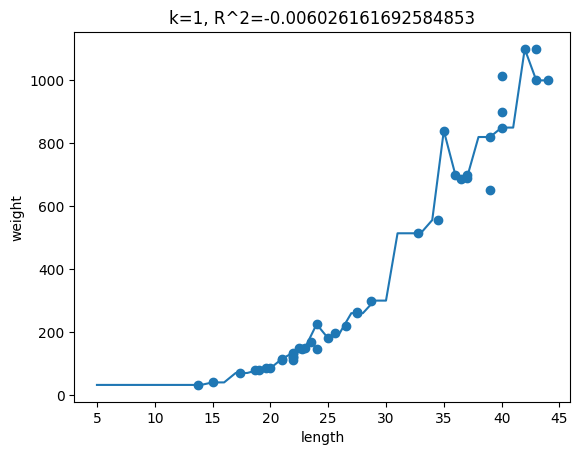

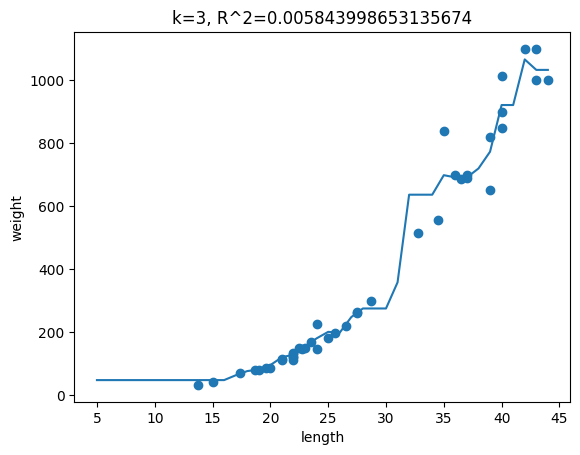

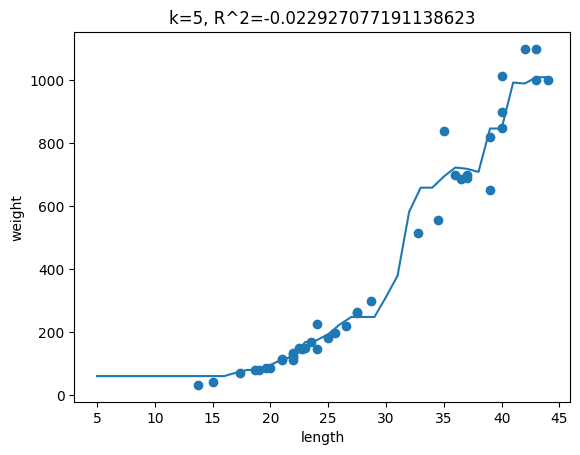

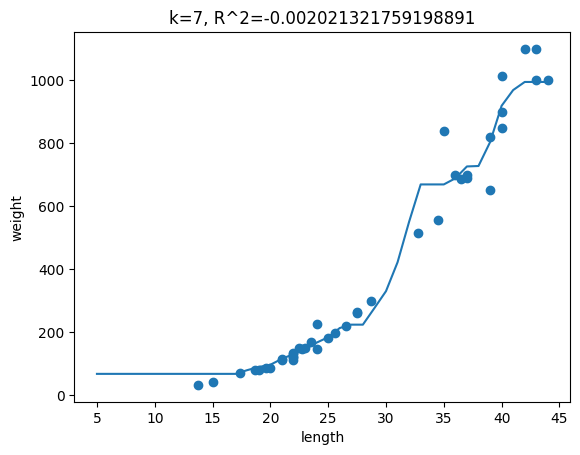

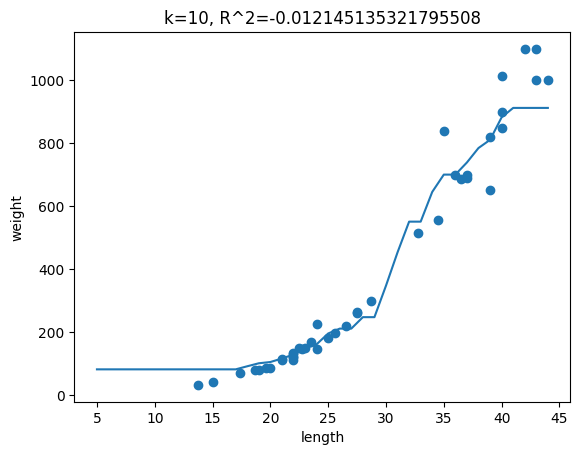

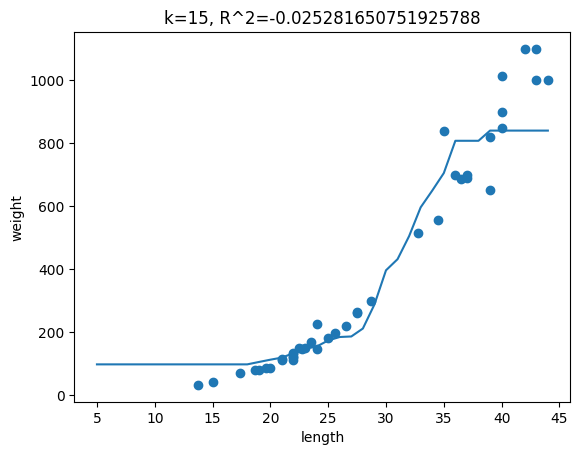

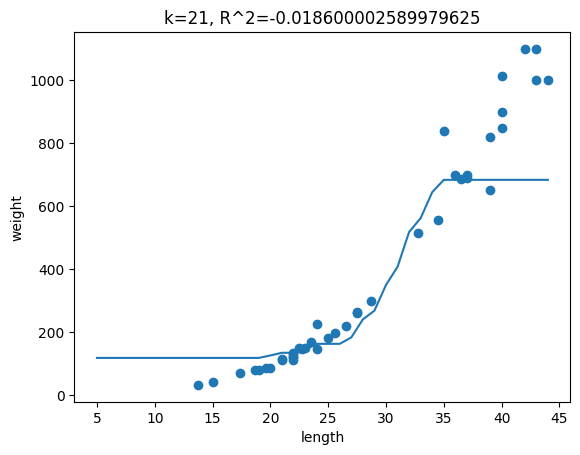

In [95]:
### 그래프로 그려보기
knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)

for k in [1,3,5,7,10,15,21]:
    knr.n_neighbors = k
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)
    
    # 결정R^2
    s_train = knr.score(train_input, train_target)
    s_test = knr.score(test_input, test_target)
    plt.title(f'k={k}, R^2={s_train-s_test}')
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.xlabel('length')
    plt.ylabel('weight')
    
    plt.show()

In [108]:
# k=3이 가장 좋음
knr = KNeighborsRegressor()
knr.n_neighbors = 3
knr.fit(train_input, train_target)

# 갖지 않은 데이터는 예상할 수 없음
print(knr.predict([[34]]))
print(knr.predict([[35]]))
print(knr.predict([[38]]))
print(knr.predict([[42]]))
# 43부터 예측값이 같음 - 예측 범위를 가지고 있음
print(knr.predict([[43]]))

[636.66666667]
[698.66666667]
[720.]
[1066.66666667]
[1033.33333333]


In [109]:
print(knr.predict([[46]]))
print(knr.predict([[47]]))
print(knr.predict([[48]]))
print(knr.predict([[49]]))
print(knr.predict([[50]]))
print(knr.predict([[100]]))

[1033.33333333]
[1033.33333333]
[1033.33333333]
[1033.33333333]
[1033.33333333]
[1033.33333333]


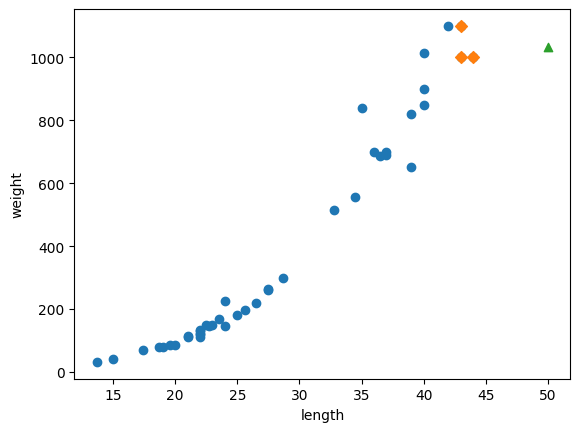

In [126]:
# 이웃을 찾아 차트로 그리기
w = 50
d, i = knr.kneighbors([[w]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[i], train_target[i], marker='D') # 이웃 3
plt.scatter(w, knr.predict([[w]])[0], marker='^') # 50 이상인값
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

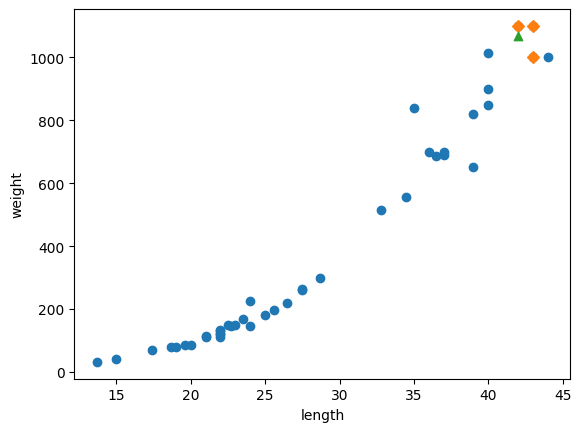

In [127]:
w = 42
d, i = knr.kneighbors([[w]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[i], train_target[i], marker='D') # 이웃 3
plt.scatter(w, knr.predict([[w]])[0], marker='^') # 50 이상인값
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

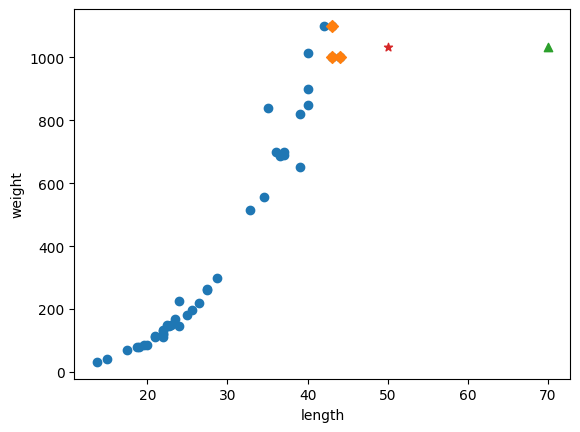

In [130]:
w = 70
d, i = knr.kneighbors([[w]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[i], train_target[i], marker='D') # 이웃 3
plt.scatter(w, knr.predict([[w]])[0], marker='^') # 50 이상인값
plt.scatter(50, knr.predict([[50]])[0], marker='*') # 50 이상인값
plt.xlabel('length')
plt.ylabel('weight')
plt.show()